### 🚲 Bike Sharing Demand Prediction using Machine Learning

In [1]:
#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [4]:
#Load the datasets

In [5]:
train = pd.read_csv("c:/users/sakshi yadav/Downloads/train.csv")

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.shape

(10886, 12)

In [8]:
test = pd.read_csv("c:/users/sakshi yadav/Downloads/test_.csv")

In [9]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
test.shape

(6493, 9)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [12]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [13]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [16]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [18]:
train.duplicated().sum()

np.int64(0)

In [19]:
test.duplicated().sum()

np.int64(0)

In [20]:
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [21]:
test.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2012-01-13 09:27:47.765285632,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
min,2011-01-20 00:00:00,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2011-07-22 15:00:00,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,2012-01-20 23:00:00,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,2012-07-20 17:00:00,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,2012-12-31 23:00:00,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151


In [22]:
#Extract datetime features

In [23]:
for df in [train, test]:
    df['hour'] = df['datetime'].dt.hour
    df['day'] = df['datetime'].dt.day
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year
    df['weekday'] = df['datetime'].dt.weekday

In [24]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011,5


In [25]:
train.shape

(10886, 17)

In [26]:
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,20,1,2011,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,2011,3


In [27]:
test.shape

(6493, 14)

In [28]:
#Exploratory Data Analysis (EDA)

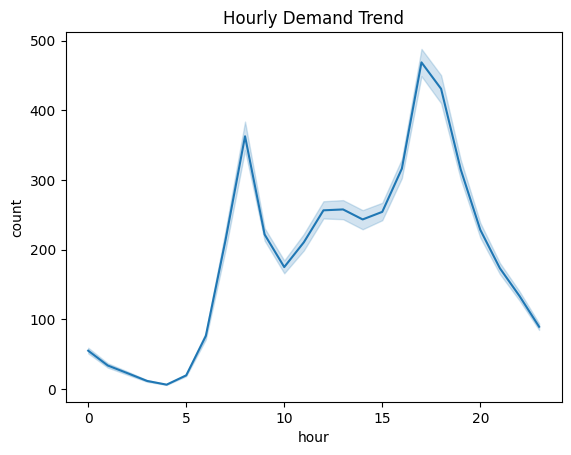

In [29]:
sns.lineplot(x='hour', y='count', data=train)
plt.title("Hourly Demand Trend")
plt.show()

Text(0.5, 1.0, 'Demand by season')

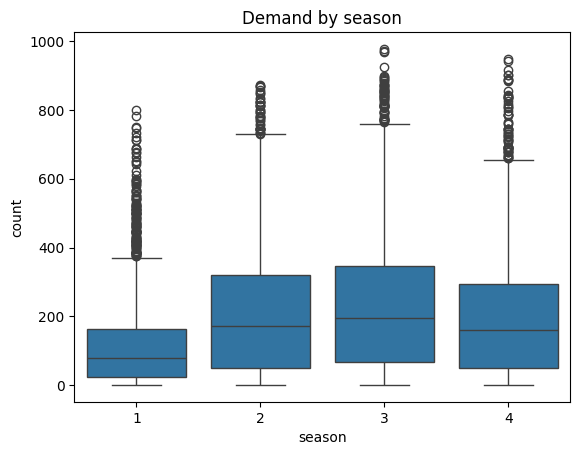

In [30]:
sns.boxplot(x='season',y='count',data=train)
plt.title("Demand by season")

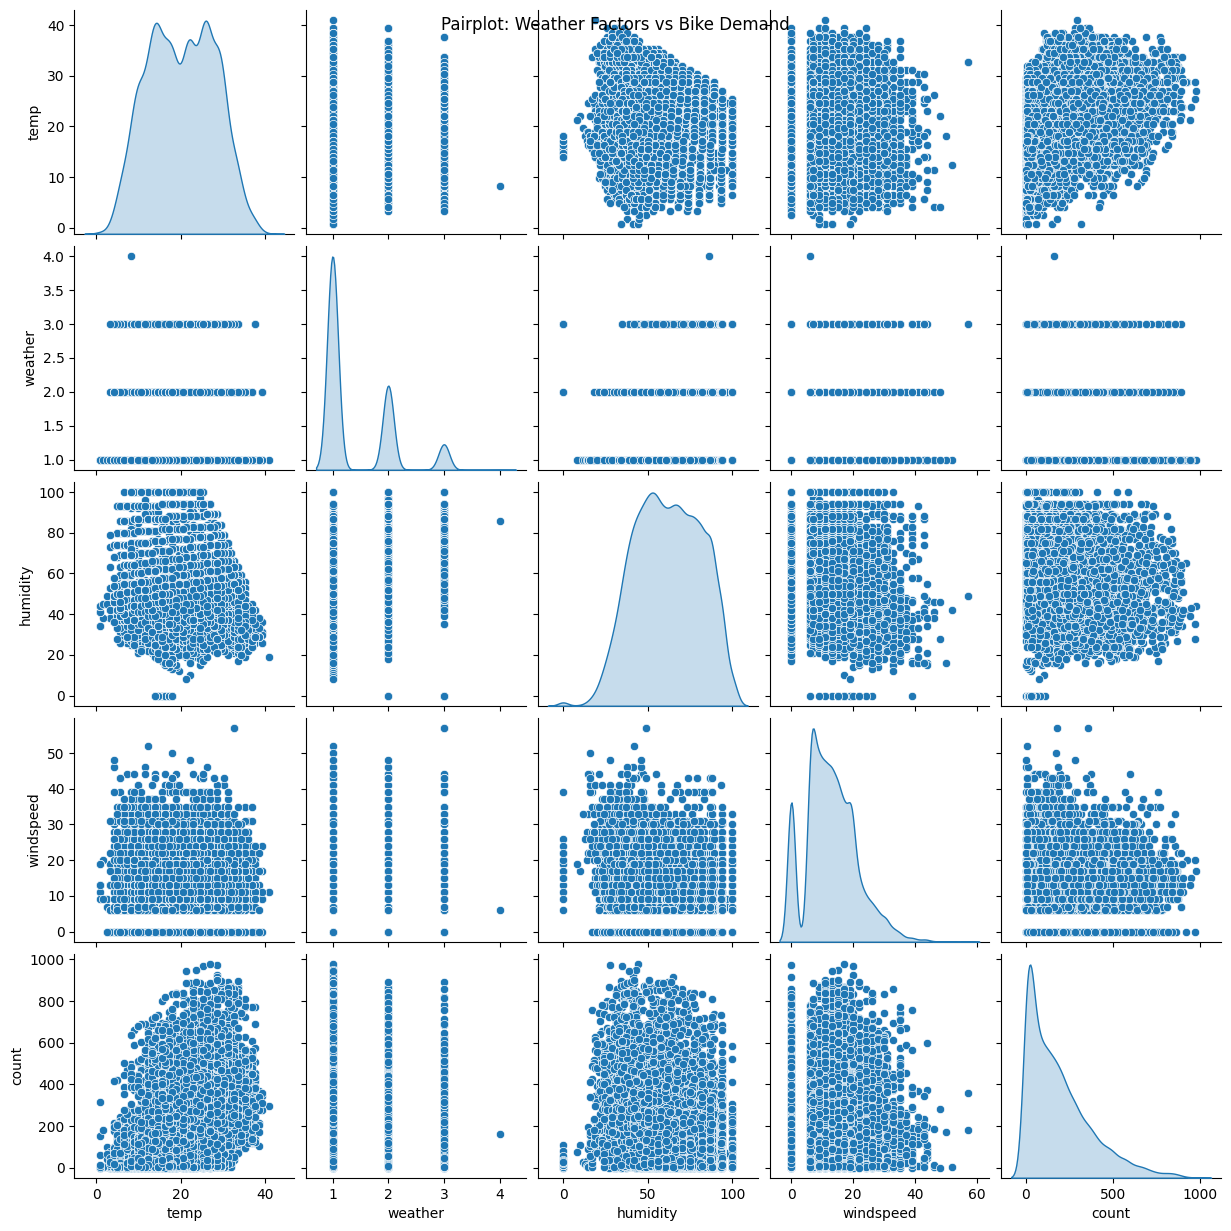

In [32]:
pairplot_features = ["temp", "weather", "humidity", "windspeed", "count"]
sns.pairplot(train[pairplot_features], diag_kind="kde")
plt.suptitle("Pairplot: Weather Factors vs Bike Demand")
plt.show()

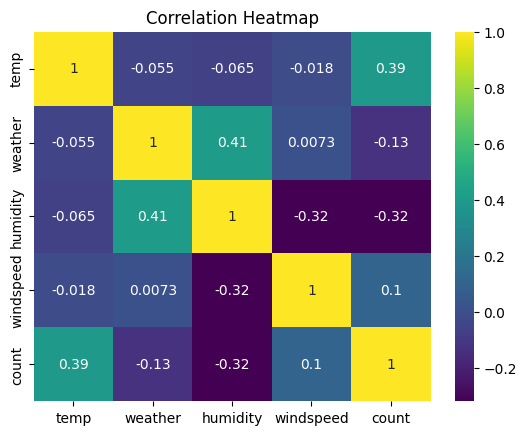

In [34]:
corr_features = ["temp", "weather", "humidity", "windspeed", "count"]
sns.heatmap(train[corr_features].corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

In [35]:
#Feature Engineering

In [36]:
train['count_log'] = np.log1p(train['count'])

In [39]:
features = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "hour", "day", "month", "year", "weekday"]

In [40]:
X = train[features]
y = train["count_log"]

In [41]:
#Train- Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
#Model

In [48]:
#Linear Regressiom
lr = LinearRegression()

In [49]:
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
y_predL = lr.predict(X_test)

In [58]:
#Random Forest

In [59]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)

In [60]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [56]:
y_predR = rf.predict(X_test)

In [61]:
#XGBoost

In [70]:
xg = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6,random_state=42)

In [71]:
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [74]:
y_predX = xg.predict(X_test)

In [77]:
print("Linear Regression (Scaled)")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predL)))
print("R2:", r2_score(y_test, y_predL))
print("-" * 50)
print("Random Forest")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predR)))
print("R2:", r2_score(y_test, y_predR))
print("-" * 50)
print("XGBoost")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predX)))
print("R2:", r2_score(y_test, y_predX))
print("-" * 50)

Linear Regression (Scaled)
RMSE: 1.024488743929235
R2: 0.49012653137085826
--------------------------------------------------
Random Forest
RMSE: 0.3027745835247512
R2: 0.9554664965454793
--------------------------------------------------
XGBoost
RMSE: 0.2791362048423308
R2: 0.9621487374141551
--------------------------------------------------


In [78]:
#Predict on Test Data

In [79]:
final_model = rf

In [80]:
final_model.fit(X, y)

RandomForestRegressor(n_estimators=200, random_state=42)

In [81]:
test_preds = final_model.predict(test[features])

In [82]:
test_preds = np.expm1(test_preds)

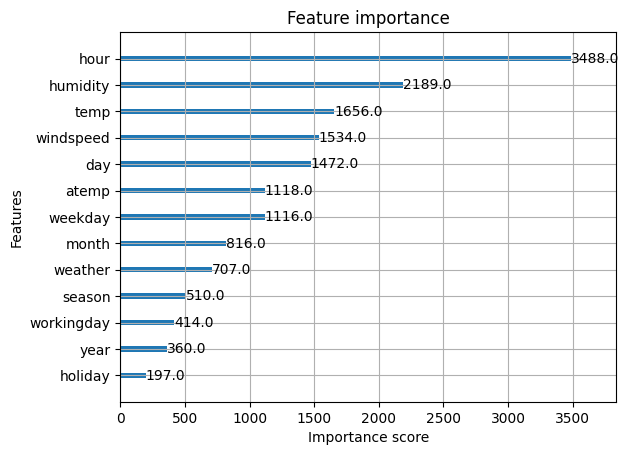

In [87]:
#Feature Importance
from xgboost import plot_importance
plot_importance(xg)
plt.show()

In [89]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xg, X, y, cv=5, scoring="r2")
print("Cross-validated R²:", scores.mean())

Cross-validated R²: 0.9121224074490248


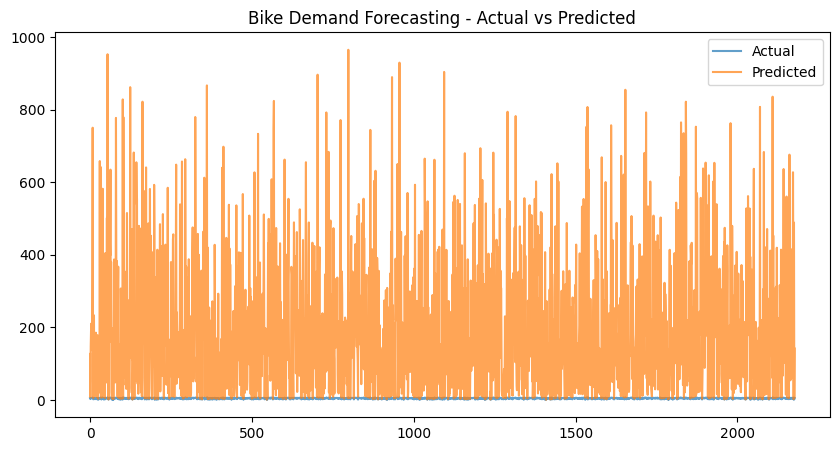

In [91]:
#Forecast Visualization
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(np.expm1(y_predX), label="Predicted", alpha=0.7)
plt.legend()
plt.title("Bike Demand Forecasting - Actual vs Predicted")
plt.show()

In [92]:
#Save Best Model

In [94]:
import joblib
joblib.dump(xg, "bike_demand_xgb.pkl")

['bike_demand_xgb.pkl']